# Fast.ai - Lesson 1 [Pets]

Based on [Fast.ai Course First Video](https://course.fast.ai/videos/?lesson=1)

Loads `autoreload` module for notebook and configure matplotlib charts to show under the executed line.

In [ ]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

Import relevent fastai modules.

In [ ]:
from fastai.vision import *
from fastai.metrics import error_rate

Set batch size to a suitable value. (Lower if GPU throws an OOM error)

In [ ]:
batch_size = 16

## Download Dataset

`fastai.vision.untar_data` will help to download and extract image datasets.

`fastai.vision.URLs` will contain popular dataset urls. See all available dataset paths using `help(URLs)`

In [4]:
help(untar_data)

Help on function untar_data in module fastai.datasets:

untar_data(url:str, fname:Union[pathlib.Path, str]=None, dest:Union[pathlib.Path, str]=None, data=True, force_download=False) -> pathlib.Path
    Download `url` to `fname` if `dest` doesn't exist, and un-tgz to folder `dest`.



In [5]:
path = untar_data(URLs.PETS); path

PosixPath('/root/.fastai/data/oxford-iiit-pet')

In [6]:
path.ls()

[PosixPath('/root/.fastai/data/oxford-iiit-pet/annotations'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images')]

In [ ]:
path_anno = path/'annotations'
path_img = path/'images'

`fastai.vision.get_image_files(path)` will load all image paths inside a directory.

In [8]:
fnames = get_image_files(path_img)
fnames[:10]

[PosixPath('/root/.fastai/data/oxford-iiit-pet/images/Bombay_208.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images/boxer_171.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images/Russian_Blue_226.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images/american_pit_bull_terrier_56.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images/Egyptian_Mau_40.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images/Siamese_186.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images/boxer_59.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images/wheaten_terrier_24.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images/Birman_166.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images/Birman_126.jpg')]

## Load dataset into memory

In [ ]:
np.random.seed(170081)

Build a regex pattern to extract label from the path.

[Regex Generator](https://regexr.com/)

In [ ]:
pattern = r'([a-zA-Z_]*)_[0-9]*[.]jpg$'

In [11]:
data = ImageDataBunch.from_name_re(path_img, fnames, pattern, ds_tfms=get_transforms(), size=224, bs=batch_size)
data.normalize(imagenet_stats)

ImageDataBunch;

Train: LabelList (5912 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
Bombay,american_pit_bull_terrier,Egyptian_Mau,Siamese,boxer
Path: /root/.fastai/data/oxford-iiit-pet/images;

Valid: LabelList (1478 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
basset_hound,samoyed,pomeranian,Siamese,Bengal
Path: /root/.fastai/data/oxford-iiit-pet/images;

Test: None

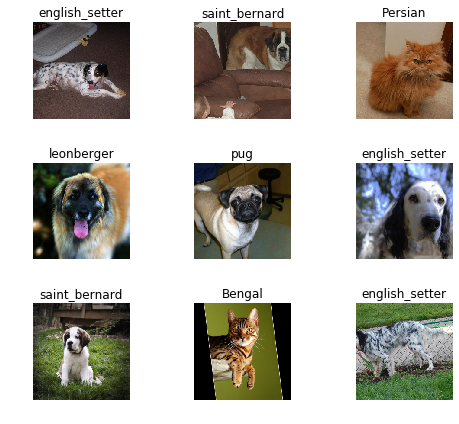

In [13]:
data.show_batch(rows=3, figsize=(7, 6))

In [14]:
print(data.classes)
print(data.c) # In classification this is same as n_classes

['Abyssinian', 'Bengal', 'Birman', 'Bombay', 'British_Shorthair', 'Egyptian_Mau', 'Maine_Coon', 'Persian', 'Ragdoll', 'Russian_Blue', 'Siamese', 'Sphynx', 'american_bulldog', 'american_pit_bull_terrier', 'basset_hound', 'beagle', 'boxer', 'chihuahua', 'english_cocker_spaniel', 'english_setter', 'german_shorthaired', 'great_pyrenees', 'havanese', 'japanese_chin', 'keeshond', 'leonberger', 'miniature_pinscher', 'newfoundland', 'pomeranian', 'pug', 'saint_bernard', 'samoyed', 'scottish_terrier', 'shiba_inu', 'staffordshire_bull_terrier', 'wheaten_terrier', 'yorkshire_terrier']
37


## Training Resnet34

In [ ]:
n_epochs = 4

In [16]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/checkpoints/resnet34-333f7ec4.pth
100%|██████████| 87306240/87306240 [00:00<00:00, 184138984.22it/s]


In [17]:
learn.model

Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (rel

In [18]:
learn.fit_one_cycle(n_epochs)

epoch,train_loss,valid_loss,error_rate,time
0,0.728912,0.331912,0.102165,01:27
1,0.588199,0.249643,0.081191,01:28
2,0.440446,0.215474,0.072395,01:29
3,0.344250,0.194396,0.060217,01:28


In [ ]:
learn.save('stage-1')

## Result evaluation

In [ ]:
interpretation = ClassificationInterpretation.from_learner(learn)

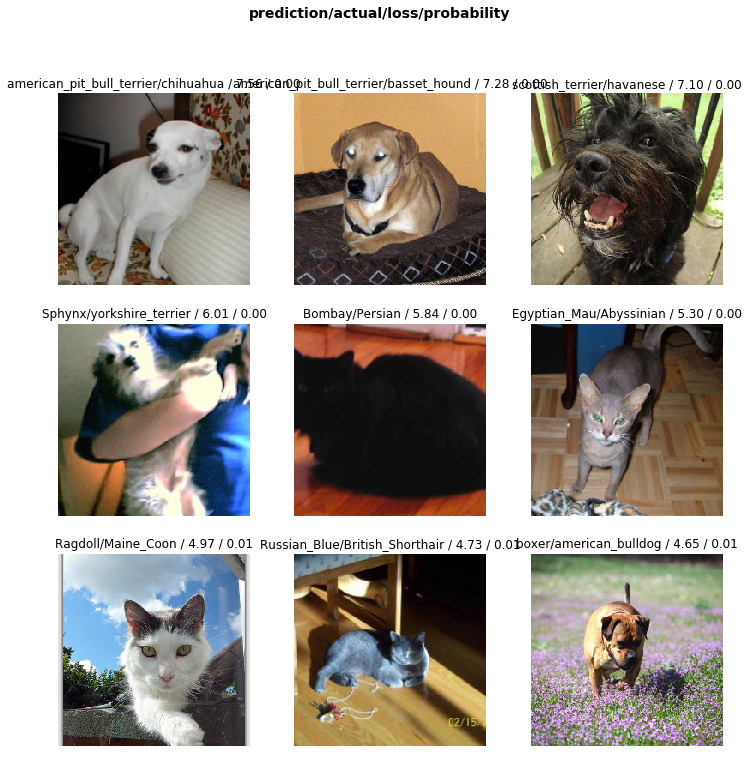

In [22]:
interpretation.plot_top_losses(9)

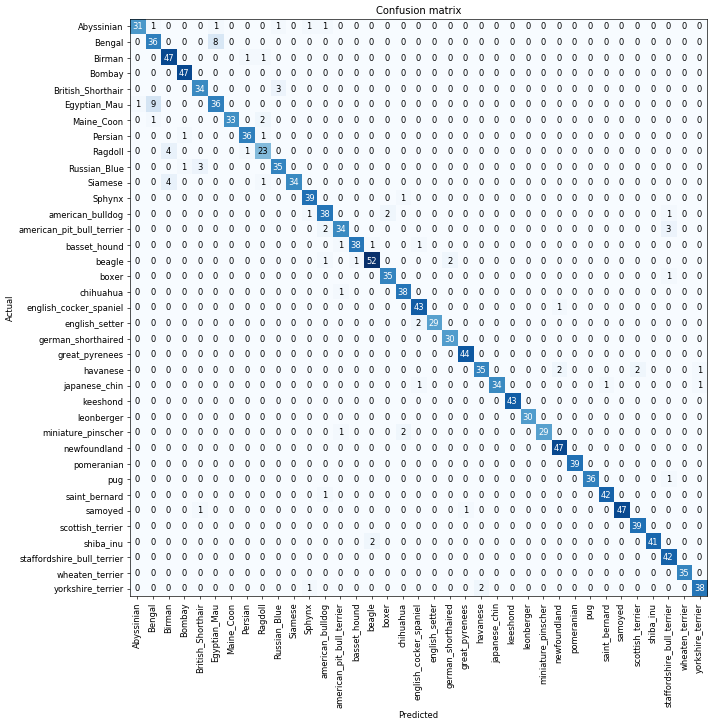

In [25]:
interpretation.plot_confusion_matrix(figsize=(12,12), dpi=60)

In [26]:
interpretation.most_confused(min_val=2)

[('Egyptian_Mau', 'Bengal', 9),
 ('Bengal', 'Egyptian_Mau', 8),
 ('Ragdoll', 'Birman', 4),
 ('Siamese', 'Birman', 4),
 ('British_Shorthair', 'Russian_Blue', 3),
 ('Russian_Blue', 'British_Shorthair', 3),
 ('american_pit_bull_terrier', 'staffordshire_bull_terrier', 3),
 ('Maine_Coon', 'Ragdoll', 2),
 ('american_bulldog', 'boxer', 2),
 ('american_pit_bull_terrier', 'american_bulldog', 2),
 ('beagle', 'german_shorthaired', 2),
 ('english_setter', 'english_cocker_spaniel', 2),
 ('havanese', 'newfoundland', 2),
 ('havanese', 'scottish_terrier', 2),
 ('miniature_pinscher', 'chihuahua', 2),
 ('shiba_inu', 'beagle', 2),
 ('yorkshire_terrier', 'havanese', 2),
 ('Abyssinian', 'Bengal', 1),
 ('Abyssinian', 'Egyptian_Mau', 1),
 ('Abyssinian', 'Russian_Blue', 1),
 ('Abyssinian', 'Sphynx', 1),
 ('Abyssinian', 'american_bulldog', 1),
 ('Birman', 'Persian', 1),
 ('Birman', 'Ragdoll', 1),
 ('Egyptian_Mau', 'Abyssinian', 1),
 ('Maine_Coon', 'Bengal', 1),
 ('Persian', 'Bombay', 1),
 ('Persian', 'Ragdoll'

## Learning Rate, unfreezing and fine tuning

In [27]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


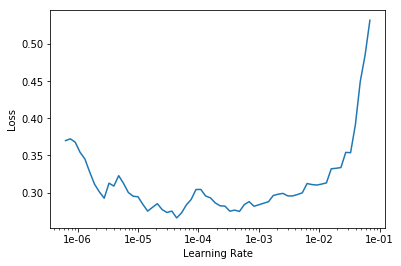

In [29]:
learn.recorder.plot()

In [ ]:
learn.unfreeze()

In [31]:
learn.fit_one_cycle(2, max_lr=slice(1e-5, 1e-3))

epoch,train_loss,valid_loss,error_rate,time
0,0.558443,0.308931,0.102165,01:28
1,0.340921,0.201531,0.065629,01:28


In [ ]:
learn.save("stage-2")